In [1]:
# !nrnivmodl mod

In [1]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'

BioName = CircuitPath + 'bioname/'

Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
# nrnPath = CircuitPath + 'sonata/edges/edges_hippocampus.h5'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'

METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'

TargetFile = CircuitPath + 'user.target'
StartFile = CircuitPath + 'start.target'

# Path = CircuitPath + 'sonata/edges/edges_hippocampus_projections.h5'

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
# conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]

In [102]:
# from bluepysnap import Simulation

# sim = Simulation(CircuitPath +'/simulations/activate_minis/minis/simulation_config.json')
# spikes = sim.spikes
# hippocampus_spikes = spikes["hippocampus_neurons"]

## Cells info

In [3]:
nodesinfo = cells.get()
nodesinfo

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current
0,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc5;SLM,-0.000000,0.306704,-0.000000,INH,409.446689,525.218483,1074.146619,0.028962,0.224609
1,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc3;SLM,-3.141593,1.051681,-3.141593,INH,692.961402,511.187277,573.179832,0.028962,0.224609
2,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc6;SLM,-3.141593,1.393882,-3.141593,INH,624.142630,520.641475,976.924721,0.028962,0.224609
3,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2,SR_SCA,mc5;SR,-3.141593,0.347655,-3.141593,INH,430.543380,411.999965,1180.185218,0.005140,0.341797
4,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2_-_Scale_x1.000_y1.050_z1.000,SR_SCA,mc5;SR,-0.000000,0.137277,-0.000000,INH,427.936977,302.239247,1013.453517,0.004947,0.341797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,cNAC,SO,hoc:CA1_int_cNAC_970717D_2019030718251,biophysical,INT,980120A,SO_BP,mc3;SO,-3.141593,1.303866,-3.141593,INH,771.381002,37.274531,231.992286,-0.011643,0.302734
18194,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc3;SO,0.000000,-1.070015,0.000000,INH,666.970306,58.551145,396.539067,-0.044198,0.449219
18195,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0,SO_BP,mc0;SO,-3.141593,1.267531,-3.141593,INH,505.811537,130.131875,182.700052,-0.044335,0.439453
18196,cNAC,SO,hoc:CA1_int_cNAC_990111HP2_2019032915570,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc4;SO,-0.000000,0.815231,-0.000000,INH,-68.542249,57.960736,940.564725,-0.001224,0.371094


In [6]:
list(nodesinfo)

['etype',
 'layer',
 'model_template',
 'model_type',
 'morph_class',
 'morphology',
 'mtype',
 'region',
 'rotation_angle_xaxis',
 'rotation_angle_yaxis',
 'rotation_angle_zaxis',
 'synapse_class',
 'x',
 'y',
 'z',
 '@dynamics:holding_current',
 '@dynamics:threshold_current']

In [281]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# most_central_10_SP_PC = range(18198)
most_central_10_SP_PC = range(35,40)
Morpholist = []
hoclist = []
for gid in most_central_10_SP_PC:
    MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s\n %s %.2f %.2f %.2f' % (nodesinfo['model_template'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
    
#     if cellName not in hoclist:
#         hoclist.append(cellName)   
        
#     if nodesinfo['morphology'][gid] not in Morpholist:
#         Morpholist.append(nodesinfo['morphology'][gid])
        

hoc:CA1_int_cAC_990611HP2_2019032816214
 mc5;SR 379.41 447.99 956.30
hoc:CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272
 mc0;SP 128.92 222.86 209.59
hoc:CA1_pyr_cACpyr_mpg141216_A_idA_2019030513333
 mc5;SP 299.64 184.32 910.95
hoc:CA1_pyr_cACpyr_oh140807_A0_idF_2019030511545
 mc0;SP 405.05 224.33 94.36
hoc:CA1_pyr_cACpyr_mpg141216_A_idA_2019030513333
 mc3;SP 720.95 207.81 557.53


In [14]:
print('hoclist size =',np.size(hoclist))
print('Morpholist size =',np.size(Morpholist))
# import os # cp only the 646 used morphos # Morpholist2 = cells.property_values(Cell.MORPHOLOGY)

# for MorphoName in Morpholist:
#     mfile = '/home/fernando/CA1__/data-bbp/20191017/morphologies/swc/' + MorphoName + '.swc'
#     outfile = MorphologyPath + MorphoName + '.swc'
#     os.popen("cp {0} {1}".format(mfile, outfile))
#     print(outfile)

hoclist size = 36
Morpholist size = 646


In [7]:
from neuron import h
from neuron.units import mV, ms
import plotly
import plotly.graph_objects as go
h.load_file("import3d.hoc")
h.load_file("stdrun.hoc")

gid = 6393 - 1

MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'

cellmorpho = h.Import3d_SWC_read()
cellmorpho.input(MorphoName)
i3d = h.Import3d_GUI(cellmorpho, False)
i3d.instantiate(None)

ps = h.PlotShape(False)
ps.variable("v")
ps.scale(-70, 40)
fig = ps.plot(plotly, line={"width": 4})

# fig.show()

(array([2553., 2694., 2484., 2633., 2595., 2664., 2575.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

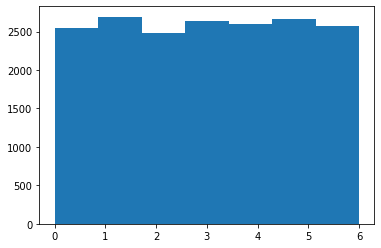

In [289]:
mcName = []
for gid in range(cells.size):
    mcName.append(int(nodesinfo['region'][gid][2:3]))  
plt.hist(mcName, bins = 7)

## Net info

In [8]:
# data-bbp/20191017/sonata/edges ~ 7.4 Gb 
circuit_path2 = '/home/fernando/CA1__/data-bbp/20191017/circuit_config.json'
circuit2 = Circuit(circuit_path2)
conn = circuit2.edges["hippocampus_neurons__hippocampus_neurons__chemical"]
print(list(circuit.nodes))
print(list(circuit2.edges))

['hippocampus_neurons', 'hippocampus_projections']
['hippocampus_neurons__hippocampus_neurons__chemical', 'hippocampus_projections__hippocampus_neurons__chemical']


In [9]:
# cells = circuit.nodes["hippocampus_neurons"]
# conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]
# proj_cells =circuit.nodes["hippocampus_projections"]
# proj_conn =circuit.edges["hippocampus_projections__hippocampus_neurons__chemical"]
print(cells.size)
print(conn.size)

18198
19698045


In [110]:
pre_mtype = 'SP_PC'
post_mtype = 'SP_PVBC' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

SP_PC SP_PVBC
253092 1245510 4.921174908728842 2.508239893425534
16860 299
36 16895 16896 17194


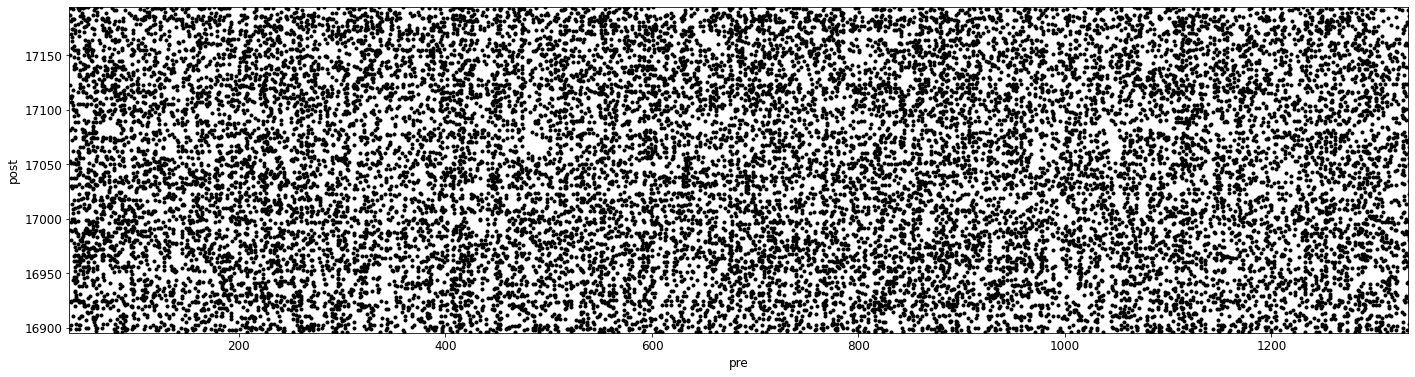

In [20]:
fig=plt.figure(figsize=(24, 6))
plt.plot(nodepre,nodepost,'.', color='black', alpha=1.0)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
plt.xlim(np.min(nodepre)-0.5,np.min(nodepre)+1296.5)
plt.ylim(np.min(nodepost)-0.5,np.max(nodepost)+0.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# fig.savefig('Adj.png')

In [111]:
pre_mtype = 'SP_PC'
post_mtype = 'SP_PC' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

SP_PC SP_PC
2783388 3553062 1.2765241497053232 0.6550574580415391
16860 16860
36 16895 36 16895


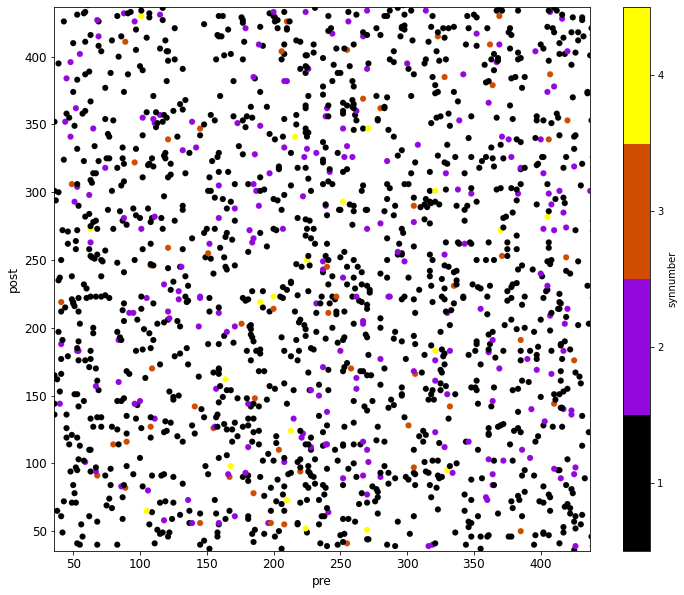

In [141]:
# plot the results
fig=plt.figure(figsize=(12, 10))
plt.scatter(nodepre,nodepost, lw=0.1,
            c=synnumber, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.colorbar(ticks=range(6), label='synnumber')
plt.clim(0.5, 4.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
plt.xlim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
plt.ylim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [113]:
for gid in nodepre[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepre[253092-4:253092+1]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[253092-4:253092+1]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
          

425 SP_PC mc4;SP 92.11 212.29 962.25
674 SP_PC mc0;SP 173.86 229.53 178.24
1883 SP_PC mc0;SP 418.88 224.12 92.80
2289 SP_PC mc1;SP 144.55 214.23 267.54

36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59

13110 SP_PC mc2;SP 278.24 205.41 805.37
13240 SP_PC mc2;SP 486.34 171.36 615.20
13263 SP_PC mc4;SP -15.75 221.85 1038.10
13307 SP_PC mc5;SP 390.22 182.53 1203.73
13315 SP_PC mc2;SP 175.61 199.02 647.10

1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53


In [142]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

In [191]:
i=0
mcout = {}
for gid in range(7):
    mcout[gid] = {}
    for gidpost in range(7):
        mcout[gid][gidpost] = 0

distance_3D = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    mcout[int(nodesinfo['region'][gid][2:3])][int(nodesinfo['region'][gidpost][2:3])] += 1
    if nodesinfo['region'][gid][0:3]=='mc2':     
        nodeprex.append(nodesinfo['x'][gid])
        nodepostx.append(nodesinfo['x'][gidpost]) 
        nodeprey.append(nodesinfo['y'][gid])
        nodeposty.append(nodesinfo['y'][gidpost])
        nodeprez.append(nodesinfo['z'][gid])
        nodepostz.append(nodesinfo['z'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))  
    
#     if nodesinfo['region'][gid][0:3] != nodesinfo['region'][gidpost][0:3]:
#     if distance3D(gid,gidpost)<50.0 and nodesinfo['region'][gid][0:3]=='mc2' and nodesinfo['region'][gidpost][0:3]=='mc1':
#         print('%d %s %s %.2f' % (numsyn,nodesinfo['region'][gid][0:3],nodesinfo['region'][gidpost][0:3],distance3D(gid,gidpost)))
#         distance_3D.append(distance3D(gid,gidpost))
        
    i+=1
# print(mc2in,mc2out)

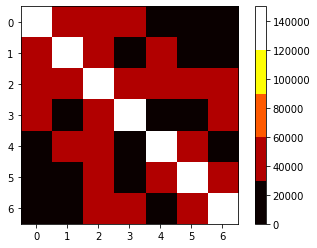

In [192]:
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
for gid in range(7):
    for gidpost in range(7):
        harvest[gid][gidpost] = float(mcout[gid][gidpost])

plt.imshow(harvest, cmap=plt.cm.get_cmap('hot', 5))
plt.colorbar()
plt.clim(0,150000)

In [194]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

2783388 468474 16.831070623283566


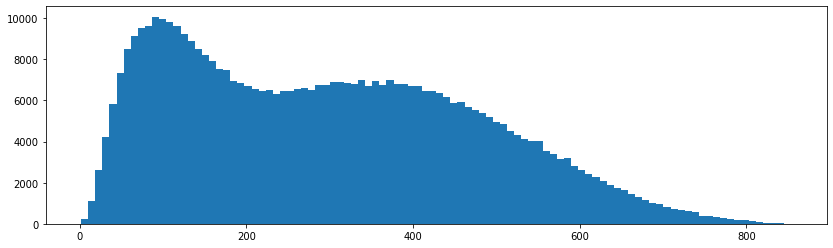

In [212]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [217]:
print(np.max(nodepostz)-np.min(nodepostz),np.max(nodepostx)-np.min(nodepostx))

1259.2435193450285 1197.7552169295802


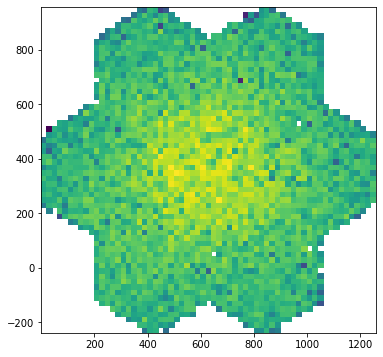

In [224]:
from matplotlib import colors
fig=plt.figure(figsize=(6,6))
plt.hist2d(nodepostz,nodepostx, bins=(63,60), norm=colors.LogNorm());

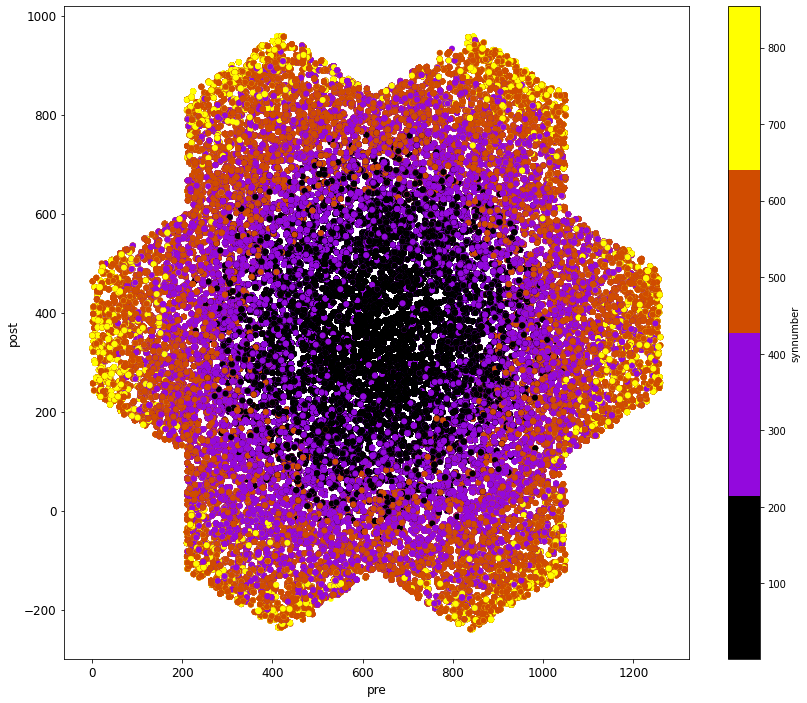

In [200]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostz,nodepostx, lw=0.05,
            c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='synnumber')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Only mc2PC:mc2PC

In [244]:
i=0
mcout = {}
for gid in range(7):
    mcout[gid] = {}
    for gidpost in range(7):
        mcout[gid][gidpost] = 0

distance_3D = []             
nodepre2 = []
nodepost2 = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    mcout[int(nodesinfo['region'][gid][2:3])][int(nodesinfo['region'][gidpost][2:3])] += 1
    if nodesinfo['region'][gid][0:3]=='mc2' and nodesinfo['region'][gidpost][0:3]=='mc2':   
        nodepre2.append(gid)
        nodepost2.append(gidpost)    
        nodeprex.append(nodesinfo['x'][gid])
        nodepostx.append(nodesinfo['x'][gidpost]) 
        nodeprey.append(nodesinfo['y'][gid])
        nodeposty.append(nodesinfo['y'][gidpost])
        nodeprez.append(nodesinfo['z'][gid])
        nodepostz.append(nodesinfo['z'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))              
    i+=1

In [245]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

2783388 149586 5.374241751419493


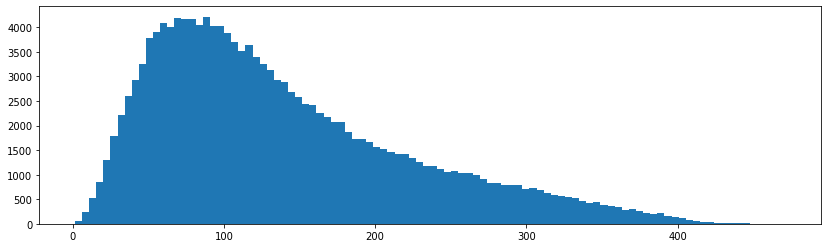

In [252]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [247]:
print(np.max(nodepostz)-np.min(nodepostz),np.max(nodepostx)-np.min(nodepostx))

419.6228977761445 470.18203023229825


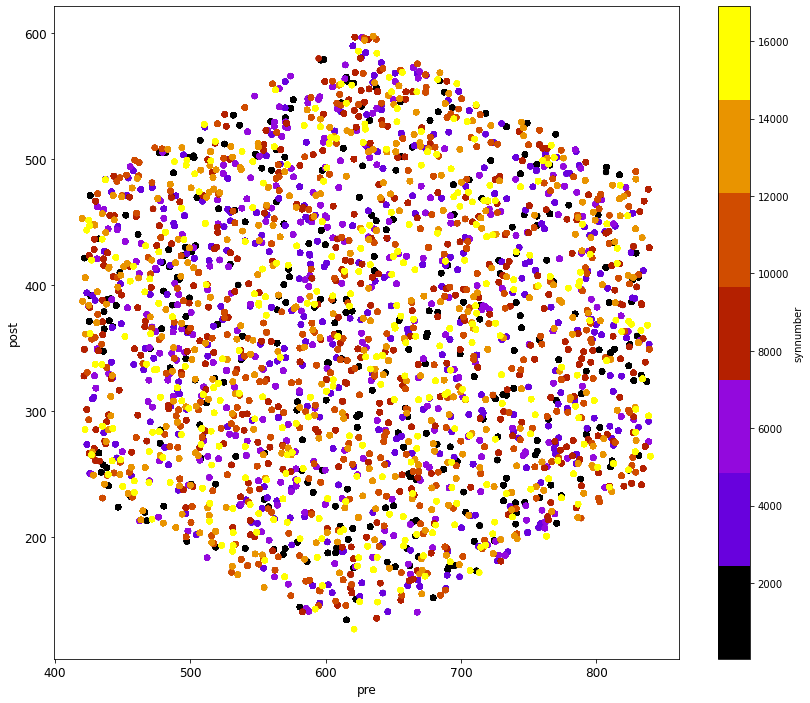

In [258]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostz,nodepostx, lw=0.05,
            c=nodepost2, cmap=plt.cm.get_cmap('gnuplot', 7))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='synnumber')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

(array([2553., 2694., 2484., 2633., 2595., 2664., 2575.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

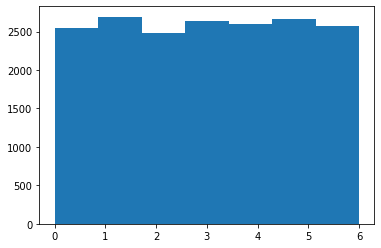

In [132]:
i=0
for gid in range(np.min(nodepre),np.max(nodepre)+1):
    for gidpost in range(np.min(nodepost),np.max(nodepost)+1):
        if distance3D(gid,gidpost)<50.0:
            i+=1
i

27355

In [131]:
np.size(distance_3D)

5470

In [10]:
mtypes = cells.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)
model_std = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)

In [114]:
nsample = 1000
def sample_nsyn(pre, post):
    it = conn.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In [32]:
for pre_mtype in mtypes:
    for post_mtype in mtypes:
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype, Cell.REGION: {'$regex': 'mc2.*'}},
            post={Cell.MTYPE: post_mtype}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()

In [33]:
model_mean

,SR_SCA,All,SLM_PPA,SP_BS,SO_BP,SP_CCKBC,SP_AA,SP_PC,SO_BS,SP_PVBC,SO_OLM,SP_Ivy,SO_Tri
SR_SCA,4.200000,NaN,NaN,1.304348,1.000000,1.142857,1.090909,5.25,1.636364,1.436782,1.111111,1.258427,1.000000
All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_BS,2.210526,NaN,NaN,4.246753,2.222222,1.800000,2.870968,5.99,2.153846,4.240000,1.603774,3.880000,2.655172
SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_CCKBC,1.285714,NaN,NaN,4.780000,2.666667,1.400000,1.712644,8.64,1.750000,4.160000,1.272727,3.210000,3.073171
SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,NaN,NaN,NaN,NaN,NaN
SP_PC,2.610000,NaN,NaN,3.350000,2.580000,3.020000,3.770000,1.28,6.330000,5.250000,2.810000,3.660000,4.030000
SO_BS,1.833333,NaN,NaN,2.312500,1.500000,1.541667,1.545455,6.50,NaN,3.204545,1.600000,2.486111,1.333333
SP_PVBC,1.088889,NaN,NaN,2.870000,1.062500,1.200000,1.260000,10.64,1.375000,2.370000,1.326087,1.900000,1.640000


In [135]:
for gidpre in range(0,7,2):
    print(gidpre,nodesinfo['region'][gidpre][0:3],nodesinfo['mtype'][gidpre])
    for gid in conn.afferent_nodes(gidpre):
        print('  ',gid,nodesinfo['region'][gid][0:3],nodesinfo['mtype'][gid])

0 mc5 SLM_PPA
   18041 mc5 SO_OLM
   18069 mc5 SO_OLM
   18081 mc5 SO_OLM
   18091 mc5 SO_OLM
   18095 mc5 SO_OLM
   18115 mc6 SO_OLM
   18145 mc1 SO_BS
2 mc6 SLM_PPA
   0 mc5 SLM_PPA
   17477 mc6 SP_BS
   18066 mc6 SO_OLM
   18078 mc6 SO_OLM
   18082 mc5 SO_OLM
   18117 mc5 SO_OLM
   18190 mc6 SO_BP
   18191 mc6 SO_BP
4 mc5 SR_SCA
   5 mc5 SR_SCA
   7 mc5 SR_SCA
   16 mc5 SR_SCA
   19 mc6 SR_SCA
   28 mc5 SR_SCA
   29 mc6 SR_SCA
   32 mc5 SR_SCA
   33 mc6 SR_SCA
   35 mc5 SR_SCA
   46 mc5 SP_PC
   121 mc5 SP_PC
   152 mc2 SP_PC
   156 mc2 SP_PC
   157 mc5 SP_PC
   178 mc4 SP_PC
   207 mc2 SP_PC
   212 mc5 SP_PC
   220 mc5 SP_PC
   253 mc5 SP_PC
   258 mc6 SP_PC
   262 mc2 SP_PC
   274 mc0 SP_PC
   281 mc0 SP_PC
   287 mc5 SP_PC
   294 mc5 SP_PC
   349 mc2 SP_PC
   361 mc6 SP_PC
   383 mc4 SP_PC
   384 mc4 SP_PC
   480 mc5 SP_PC
   486 mc6 SP_PC
   502 mc5 SP_PC
   511 mc2 SP_PC
   526 mc5 SP_PC
   532 mc5 SP_PC
   552 mc4 SP_PC
   560 mc2 SP_PC
   572 mc6 SP_PC
   575 mc3 SP_PC
   590

   17701 mc5 SP_Ivy
   17724 mc5 SP_Ivy
   17725 mc5 SP_Ivy
   17733 mc5 SP_Ivy
   17734 mc5 SP_Ivy
   17737 mc6 SP_Ivy
   17741 mc6 SP_Ivy
   17747 mc6 SP_Ivy
   17764 mc5 SP_Ivy
   17767 mc5 SP_Ivy
   17769 mc5 SP_Ivy
   17774 mc5 SP_Ivy
   17809 mc5 SP_Ivy
   17810 mc5 SP_Ivy
   17814 mc6 SP_Ivy
   17855 mc5 SP_Ivy
   17862 mc5 SP_Ivy
   17866 mc6 SP_Ivy
   17868 mc5 SP_Ivy
   17873 mc6 SP_Ivy
   17894 mc5 SP_Ivy
   17952 mc5 SP_Ivy
   17957 mc2 SP_Ivy
   17962 mc5 SP_Ivy
   17963 mc5 SP_Ivy
   17965 mc5 SP_Ivy
   17972 mc5 SP_Ivy
   17973 mc2 SP_Ivy
   17984 mc2 SP_Ivy
   18013 mc5 SP_Ivy
   18032 mc5 SP_Ivy
   18090 mc5 SO_OLM
   18136 mc4 SO_BS
   18156 mc5 SO_Tri
   18159 mc5 SO_Tri
   18162 mc2 SO_Tri
   18184 mc5 SO_Tri
   18191 mc6 SO_BP
6 mc0 SR_SCA
   12 mc3 SR_SCA
   21 mc2 SR_SCA
   25 mc2 SR_SCA
   215 mc2 SP_PC
   218 mc0 SP_PC
   234 mc2 SP_PC
   248 mc3 SP_PC
   291 mc3 SP_PC
   319 mc0 SP_PC
   393 mc0 SP_PC
   417 mc1 SP_PC
   456 mc0 SP_PC
   469 mc6 SP_PC
   539 m

In [137]:
# we sample the edges to reduce the memory usage
N = 10000
sampled_edge_ids = np.random.choice(conn.size, N, replace=False)

In [138]:
print(conn.size, cells.size)

19698045 18198


In [145]:
import nrrd

In [148]:
atlas_directory = '/home/fernando/CA1__/data-bbp/20191017/atlas'
br_data, br_metadata = nrrd.read(Path(atlas_directory, "brain_regions.nrrd"))

TypeError: 'str' object is not callable

In [147]:
atlas_directory = '/home/fernando/CA1__/data-bbp/20191017/atlas'
br_data, br_metadata = nrrd.read(Path(atlas_directory, "brain_regions.nrrd"))

# hierarchy contains the region hierarchy: 01 -> [mc0->[mc0;SO, mc0;SP, ...], mc1-> [mc1;SO, mc1;SP, ...], ...]
hierarchy = json.load(open(Path(atlas_directory, "hierarchy.json")))

id_layer_map = {}
for column in hierarchy["children"]:
    for region in column["children"]:
        id_ = region["id"]
        layer = region["acronym"].split(";")[-1]
        id_layer_map[id_] = layer
id_layer_map[0] = 'out'

spacing = br_metadata["space directions"].diagonal()
offset = br_metadata["space origin"]

AttributeError: 'str' object has no attribute 'read'

In [140]:
# we get the position of all the synapses from the projections and add it to a pandas dataframe
synapses = conn.positions(sampled_edge_ids, 'afferent', "center")

indices = np.array((synapses[["x", "y", "z"]].to_numpy() - offset) / spacing, dtype=int)
labels = br_data[tuple(indices.T)]
def _apply_mapping(x):
    return id_layer_map[x]

apply_mapping = np.vectorize(_apply_mapping)
layers = apply_mapping(labels)
synapses['layer'] = layers

NameError: name 'offset' is not defined

## Import to NetPyNE


Start time:  2021-05-20 18:10:28.075208

Creating network of 10 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.34 s.
Making connections...
  Number of connections on node 0: 319 
  Number of synaptic contacts on node 0: 322 
  Done; cell connection time = 0.04 s.
Adding stims...
  Number of stims on node 0: 50 
  Done; cell stims creation time = 0.01 s.
Recording 10 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 50.24 s; real-time ratio: 0.02.

Gathering data...
  Done; gather time = 0.30 s.

Analyzing...
  Cells: 50
  Connections: 369 (7.38 per cell)
  Synaptic contacts: 372 (7.44 per cell)
  Spikes: 3109 (62.18 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 50.24 s
  Done; saving time = 0.01 s.
Plotting raster...


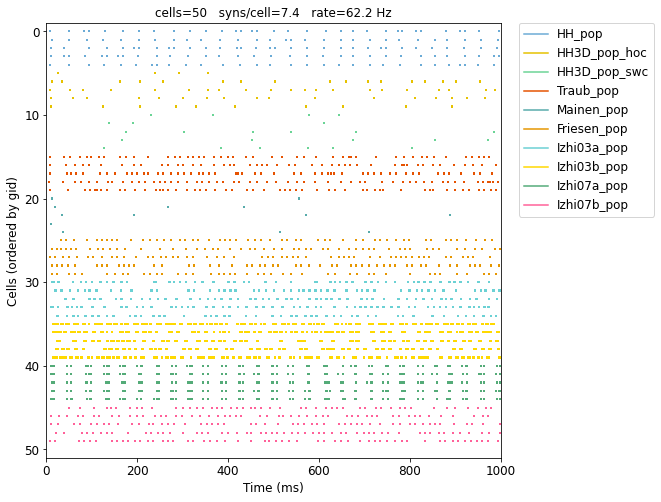

Plotting recorded cell traces ... cell


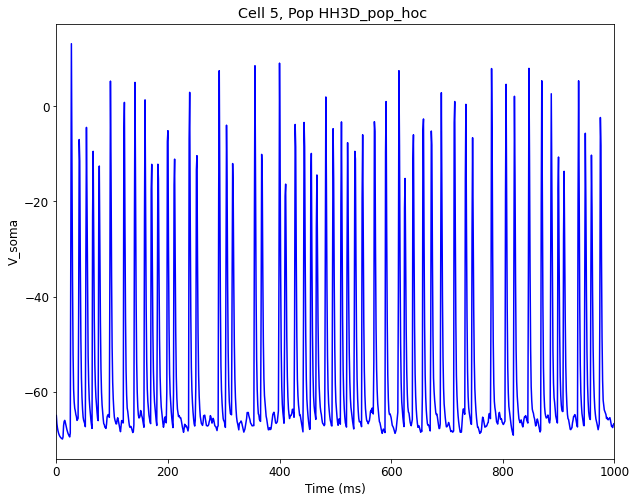

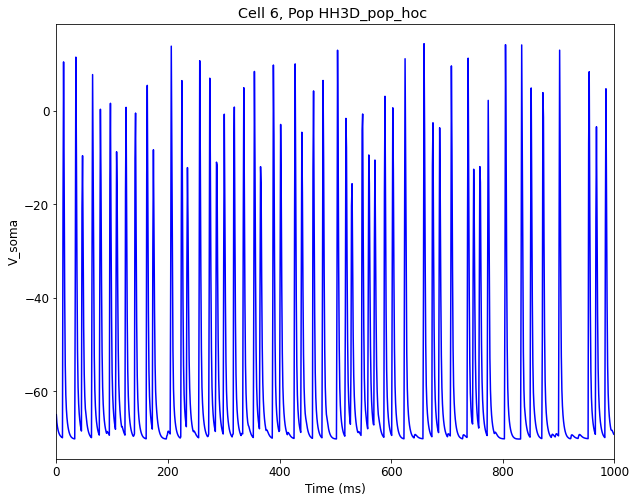

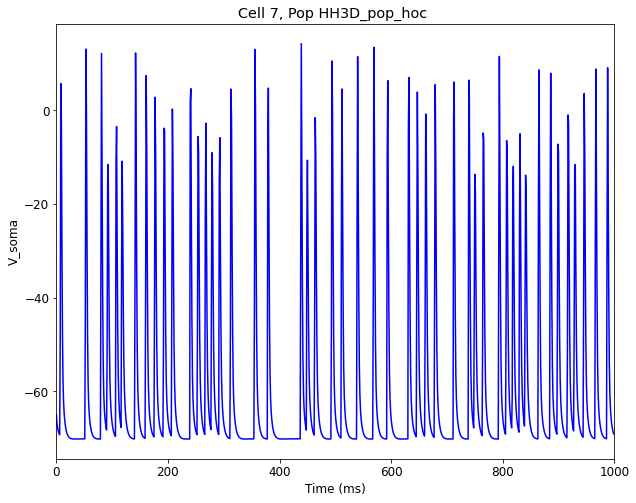

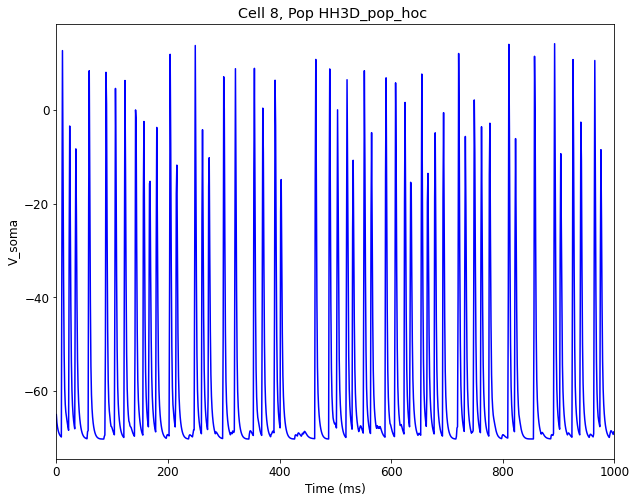

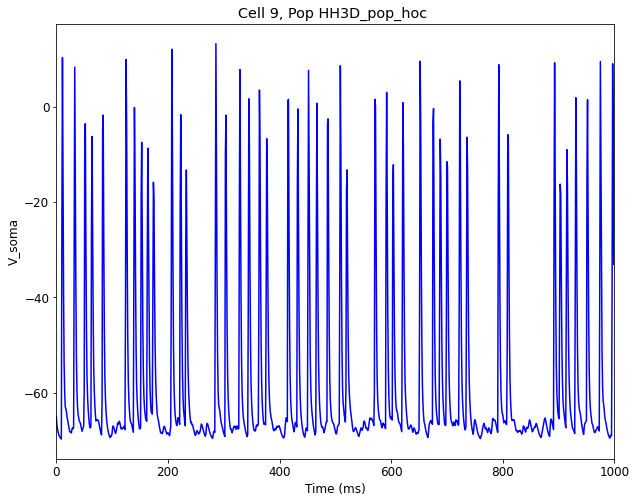

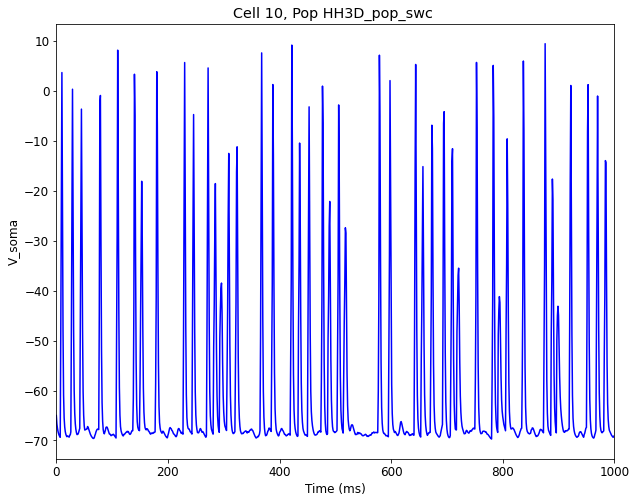

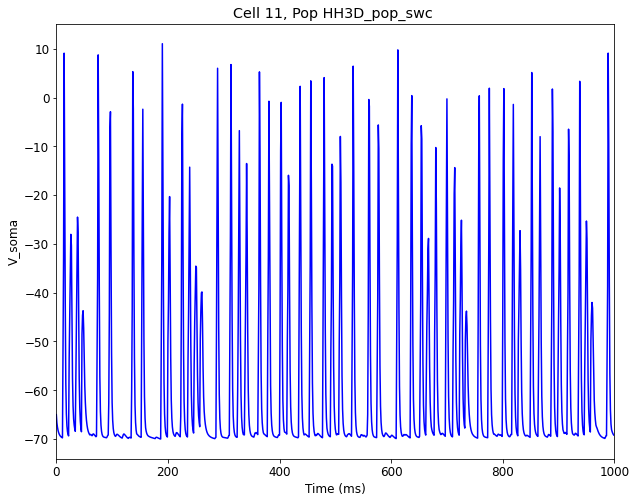

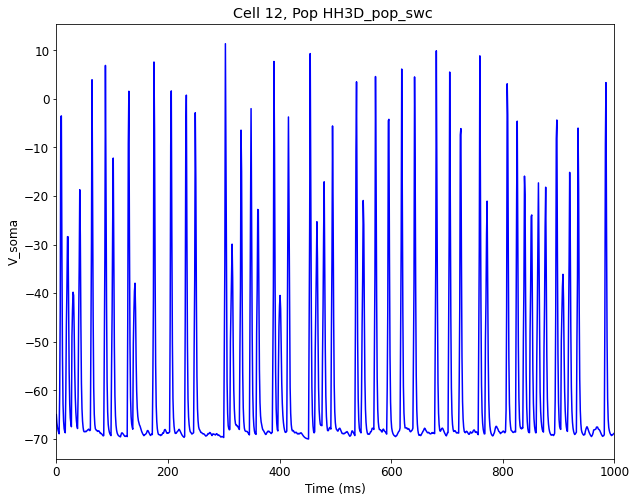

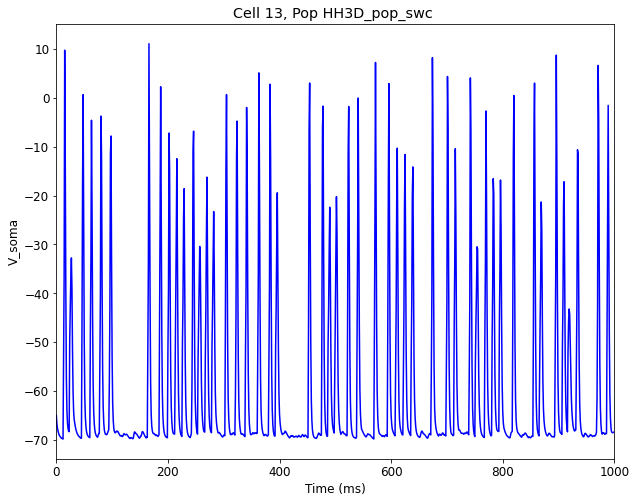

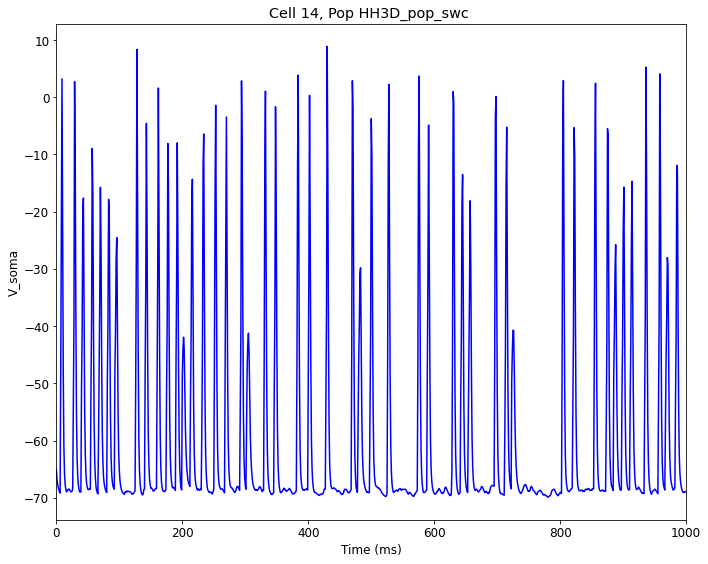

  Done; plotting time = 2.96 s

Total time = 53.92 s

End time:  2021-05-20 18:11:21.993169


In [6]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['HH_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HHpy'}
netParams.popParams['HH3D_pop_hoc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_hoc'}
netParams.popParams['HH3D_pop_swc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_swc'}
netParams.popParams['Traub_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Traub'}
netParams.popParams['Mainen_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Mainen'}

### HH
netParams.importCellParams(
    label='PYR_HH_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HHpy'},
    fileName='HHCellFile.py', 
    cellName='HHCellClass', 
    importSynMechs=True,
    )


### HH3D HOC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_hoc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_hoc'},
    fileName='geom.hoc', 
    cellName='E21', 
    importSynMechs=False,
    )
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1


### HH3D SWC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_swc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_swc'},
    fileName='BS0284.swc', 
    cellName='BS0284',
    )
netParams.renameCellParamsSec('PYR_HH3D_swc_rule', 'soma_0', 'soma')  # rename imported section 'soma_0' to 'soma'
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1
    if secName.startswith('soma'):
        cellRule['secs'][secName]['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}


### Traub
cellRule = netParams.importCellParams(
    label='PYR_Traub_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Traub'},
    fileName='pyr3_traub.hoc', 
    cellName='pyr3',
    )
somaSec = cellRule['secLists']['Soma'][0]
cellRule['secs'][somaSec]['spikeGenLoc'] = 0.5


### Mainen
netParams.importCellParams(
    label='PYR_Mainen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Mainen'},
    fileName='mainen.py', 
    cellName='PYR2',
    )


### Friesen
cellRule = netParams.importCellParams(
    label='PYR_Friesen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Friesen'},
    fileName='friesen.py', 
    cellName='MakeRSFCELL',
    )
cellRule['secs']['axon']['spikeGenLoc'] = 0.5


### Izhi2003a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi03a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003a'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',
    cellArgs={'type':'tonic spiking', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi03a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2003a_0']['vref'] = 'V' # specify that uses its own voltage V


### Izhi2003b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi03b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003b'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'tonic spiking'},
    )


### Izhi2007a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi07a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007a'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi07a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['vref'] = 'V' # specify that uses its own voltage V
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['synList'] = ['AMPA', 'NMDA', 'GABAA', 'GABAB']  # specify its own synapses


### Izhi2007b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi07b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007b'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS'},
    )


## Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0}  # soma NMDA synapse


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 50, 'noise': 0.5}
netParams.stimTargetParams['bg1'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Traub', 'HH', 'HH3D_hoc', 'HH3D_swc', 'Mainen', 'Izh2003b', 'Izh2007b']}, 'weight': 0.1, 'delay': 5, 'sec': 'soma'}
netParams.stimTargetParams['bg2'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Friesen','Izh2003a', 'Izh2007a']}, 'weight': 5, 'delay': 5, 'sec': 'soma'}


## Connectivity params
netParams.connParams['recurrent'] = {
    'preConds': {'cellType': 'PYR'}, 
    'postConds': {'cellType': 'PYR'},  #  PYR -> PYR random
    'connFunc': 'convConn',           # connectivity function (random)
    'convergence': 'uniform(0,10)',   # max number of incoming conns to cell
    'weight': 0.001,                  # synaptic weight
    'delay': 5,                       # transmission delay (ms)
    'sec': 'soma'}                    # section to connect to

netParams.connParams['HH->izhi07a'] = {
    'preConds': {'pop': 'HH_pop'}, 
    'postConds': {'pop': 'Izhi07a_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 5,                # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to

netParams.connParams['izhi07a->HH'] = {
    'preConds': {'pop': 'Izhi07a_pop'}, 
    'postConds': {'pop': 'HH_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 0.1,              # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
simConfig.recordStep = 1            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}           
simConfig.analysis['plotTraces'] = {'include': ['HH3D_pop_hoc', 'HH3D_pop_swc']}            


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


In [7]:
!rm -r x86_64


In [9]:
sim.net.pops['HH_pop'].tags

ODict([('cellType', 'PYR'),
       ('numCells', 5),
       ('cellModel', 'HH'),
       ('pop', 'HH_pop')])